# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/charlesporter/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


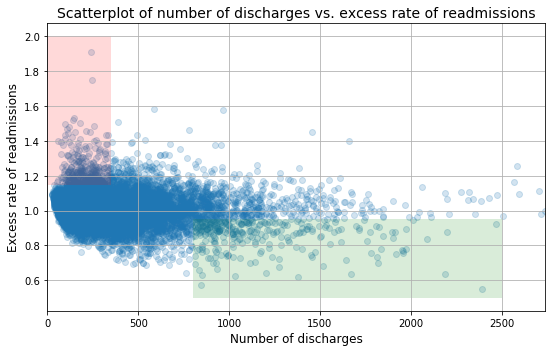

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

I'll be conducting two frequentist statistical hypothesis tests to determine whether I agree with the reports findings that the mean excess readmission ratio for discharges below 100 is significantly different than the mean excess readmission ratio for the whole population, and that the mean excess readmission ratio for discharges above 1000 is significantly different than the mean excess readmission ratio for the whole population.

In [41]:
dfr = clean_hospital_read_df[['Number of Discharges','Excess Readmission Ratio']][81:-3]
dfr.corr() # A basic check to make sure the correlation is negative.
#the correlation is negative, as discharges go up, excess readmissions go down

total_mean = dfr['Excess Readmission Ratio'].mean() # 1.008

Null hypothesis: for discharges < 100 the excess readmission ratio mean = the excess readmission ratio mean of the total population

Alternatate hypothesis: for discharges < 100 the excess readmission ratio mean > the excess readmission ratio mean of the total population

In [42]:
below_100 = dfr[dfr['Number of Discharges']<100]
below_mean = below_100['Excess Readmission Ratio'].mean() #1.023
n_below = len(below_100) #1188
z_below = (below_mean-total_mean)/(below_100['Excess Readmission Ratio'].std()/np.sqrt(n_below)) 
z_below

8.9632989984585603

For a z score of 8.963, the p value is below .0001, below alpha of 0.01, therefore we reject the null. 
I agree with the reports findings on the excess readmission ratio with discharges below 100.

Null hypothesis: for discharges > 1000 the excess readmission ratio mean = the excess readmission ratio mean of the total population

Alternatate hypothesis: for discharges > 1000 the excess readmission ratio mean < the excess readmission ratio mean of the total population

In [43]:
above_1000 = dfr[dfr['Number of Discharges']>1000]
above_mean = above_1000['Excess Readmission Ratio'].mean() # 0.979
n_above = len(above_1000) # 460
z_above = (above_mean-total_mean)/(above_1000['Excess Readmission Ratio'].std()/np.sqrt(n_above))
z_above

-5.1154515985092397

For a z score of -5.115 the p value is below .0001, below alpha of 0.01, therefore we reject the null. 
I agree with the reports findings on the excess readmission ratio with discharges above 1000

### Conclusion
I agree with the findings of the report, the difference in excess mean ratio for discharges below 100 and above 1000 are both statistically significant. The cut-off of below 100 or above 1000 discharges is arbitrary here though. While their findings are correct in these situations, it would be helpful to have more insight as to why these amounts were chosen. 

The statistical and practical significance are related here. Something needs to be improved in the hospitals that discharge less than 100 people. From this data we cannot conclude for what reason the excess readmission rate is higher where the number of discharges is lower and lower where the number of discharges is higher, but there is a difference. It is worth exploring further why this may be the case. 

This information changes the recommendation only to explore further. I cannot reject what the reports recommends, but neither can I completely support it yet. More analysis on why this is occuring must be done. For instance, there could be certain features of smaller hospitals and the patients who go to smaller hospitals, not the quality of the care itself, that lead to a higher excess readmission ratio. At this stage of analysis, recommending hospitals to consolidate and simply improve quality of care feels as though it is treating the symptom as opposed to the disease. 



### Plot
This scatter plot conveys the information fairly well. It shows the whole picture, but offers guidance by shading 'worse' excess readmission ratios in red and 'better' excess readmission ratios in green. The particular shaded zones are fairly arbitrary though and it doesn't correspond to their conclusions of their report that mention numbers below 100 and above 1000 discharges. Also it doesn't properly show the difference in means. This graph exagerates the actual difference. Additionally the grid lines do not add to the graph, only distracting the viewer. 

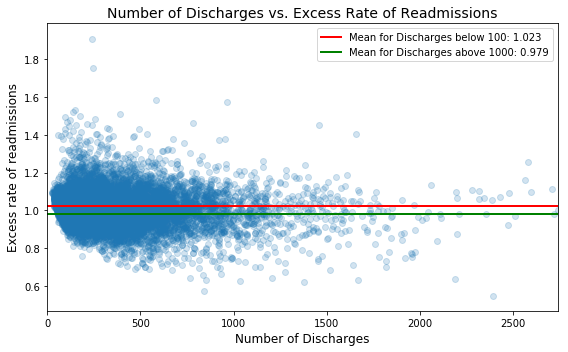

In [77]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.plot([0, max(x)], [below_mean, below_mean], 'r-', lw=2, label='Mean for Discharges below 100: %.3f' % (below_mean))
ax.plot([0, max(x)], [above_mean, above_mean], 'g-', lw=2, label='Mean for Discharges above 1000: %.3f' % (above_mean))

plt.legend()
ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of Discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Number of Discharges vs. Excess Rate of Readmissions', fontsize=14)

fig.tight_layout()